In [4]:
!pip install scikit-learn
import sklearn
sklearn.__version__

'1.8.0'

In [8]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.3 MB 8.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.3 MB 9.2 MB/s eta 0:00:01
   --------------------------- ------------ 5.8/8.3 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.3 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 9.7 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------------ --- 2.1/2.3 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 10.3 MB/s  0:00:00
   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   -------------- ------------------------- 2.6/7.1 MB 12.2 MB/s eta 0:00:01
   ----------------------------- ---------- 5.2/7.1 MB 12.3 MB/s eta 0:00:01
   ---------------------------------------- 7.1/7.1 MB 11.6 MB/s  0:00:00

   --------------------------------

# Notebook: NBA Data

## 0. Introdução / Contexto / Objetivo do Projeto

- Identificação da equipa: [26535 Pedro Simões + 26025 Carlos Brandão + 26027 Pedro Carneiro]
- Contexto:
    - A modalidade basquetebol (NBA) tem elevado volume de dados estatísticos sobre jogadores (minutos jogados, pontos, assistências, percentagens, etc.).
    - Com o crescimento da análise estatística no desporto, é interessante aplicar técnicas de Machine Learning para extrair insights além dos tradionais.
- Propósito:
    - Mostrar como diferentes métodos de ML (classificação, clustering, regras de associação) podem ajudar a segmentar jogadores, prever desempenhos e descobrir padrões de comportamento/performance.
- Motivação:
    - Ajudar, por exemplo, um clube ou analista a identificar talentos, agrupar jogadores com perfis similares, ou entender que combinações de atributos caracterizam jogadores de alto desempenho.

## 1. Dataset – Fonte e Descrição + EDA + Metadata

- Fonte: “NBA Player Data (1996-2024)” (link do dataset) :contentReference[oaicite:4]{index=4}  
- Carregamento dos dados (pandas, etc.)
- Metadata:
    - Número de registos (linhas)  
    - Número de colunas  
    - Tipos de variáveis (numéricas, categóricas, booleanas, datas, etc.)  
    - Definição e descrição de cada atributo/coluna: p.ex. jogos disputados, minutos, pontos por jogo, assistências, percentagem de lançamento, posição, equipa, época, idade, etc.  
    - Variável(s) alvo(s) — a definir conforme objetivo de classificação/clustering (ex.: “alto desempenho” = jogadores acima de certo limiar de estatísticas, ou “All-Star” se houver esse rótulo, etc.)

- Análise Exploratória (EDA):
    - Estatísticas descritivas (mean, median, std, min, max) para as variáveis numéricas.  
    - Contagem / frequência para variáveis categóricas (posição, equipa, época, etc.)  
    - Distribuições (histogramas) de algumas variáveis chave: pontos por jogo, minutos, idade, efficiency, etc.  
    - Análise de correlações entre variáveis numéricas (matriz de correlação, heatmap).  
    - Identificação de valores ausentes ou inconsistências (missing data, outliers).  
    - Possível visualização: scatter-plots para relação entre variáveis (ex: idade vs pontos, minutos vs eficiência), boxplots, etc.

## 2. Objetivos de Negócio / Hipóteses de ML

### Objetivo de Classificação  
- **Hipótese**: “É possível prever se um jogador é de alto desempenho (ou “star”) com base em estatísticas básicas e demográficas.”  
- **Rótulo alvo**: definir “alto desempenho” — por exemplo, jogadores com média de pontos/assistências acima de certo limiar, ou top X por percentil.  
- **Uso prático**: ajudar scouts ou equipas a identificar novos talentos ou jogadores sub-avaliados.

### Objetivo de Clustering  
- Agrupar jogadores com perfis semelhantes — por exemplo:
  - “Scorers” (pontos elevados, muitos minutos),  
  - “Defensive / Role Players” (menos pontos, mas talvez ressalvas, roubos, rebounds, etc.),  
  - “Young promising players”,  
  - “Veteranos com uso limitado”, etc.  
- **Uso prático**: segmentação de plantel, análise comparativa entre grupos, planeamento de equipa/formação.

### Objetivo de Regras de Associação (no futuro)  
- Descobrir **combinações de atributos frequentes** entre jogadores com performance elevada — por exemplo: “jogadores com >20 pts/jogo **e** eficiência acima de X **e** menos de Y turnovers tendem a ter carreira longa / All-Star / transferência de alto valor”.  
- **Uso prático**: definir perfis de “jogador ideal” para recrutamento ou treino, auxiliar decisões de scouting.



# Clustering — NBA Player Data
## Player Performance Profiling


## 1. Objetivo de Negócio

O objetivo desta análise é aplicar **técnicas de clustering (agrupamento)** para agrupar jogadores da **NBA** em **perfis com características de desempenho semelhantes**, sem recorrer a rótulos pré-definidos.

Ao identificar clusters de jogadores com padrões estatísticos semelhantes, esta análise pode apoiar:
- Definição de perfis de jogadores 
- Análise da composição das equipas  
- Identificação de talento  
- Comparação entre diferentes tipos de jogadores (por exemplo, pontuadores, organizadores de jogo, jogadores de apoio)


## 2. Descrição do Dataset

O dataset contém estatísticas normalizadas e avançadas de jogadores da **NBA** ao longo de várias épocas, incluindo informações demográficas, atributos físicos e métricas de desempenho.


In [2]:
import pandas as pd

df = pd.read_csv("nba_data.csv")
df.head()


,normalized_name,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,pts,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
0,Allen Iverson,26,183.58,74.61,Georgetown,USA,1996,1,1,31.1,...,0.814,24.0,0.518,5.2,23.0,10.0,35.9,11.8,6.1,6.1
1,Jerry Stackhouse,26,198.15,99.23,North Carolina,USA,1995,1,3,29.8,...,0.822,21.8,0.521,5.2,25.8,12.5,35.2,9.2,5.8,5.1
2,Shaquille O'Neal,29,216.31,142.56,Louisiana State,USA,1992,1,1,28.7,...,0.513,30.2,0.574,18.1,18.8,10.5,31.6,14.9,7.1,7.7
3,Kobe Bryant,22,201.60,95.20,NaN,USA,1996,1,13,28.5,...,0.853,24.5,0.552,8.1,23.0,11.1,31.8,11.3,4.7,4.8
4,Vince Carter,24,198.64,102.34,North Carolina,USA,1998,1,5,27.6,...,0.765,25.0,0.551,7.9,19.2,8.2,30.7,12.9,7.2,7.6


## 3. Preparação dos Dados

Para a tarefa de clustering, foram selecionadas apenas **variáveis numéricas relacionadas com o desempenho dos jogadores e atributos físicos**.

As variáveis categóricas foram excluídas ou codificadas apenas para análise após a formação dos clusters.

In [3]:
# Select numerical features for clustering
features = [
    "age",
    "player_height",
    "player_weight",
    "pts",
    "reb",
    "ast",
    "MP.x",
    "G.x",
    "PER",
    "TS.",
    "TRB.",
    "AST.",
    "TOV.",
    "USG.",
    "WS",
    "VORP",
    "BPM"
]

X = df[features].copy()

# Handle missing values
X = X.fillna(X.median())


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 4. Aplicação do Clustering K-Means


In [6]:
from sklearn.cluster import KMeans

# Initial K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters


## 5. Avaliação do Número de Clusters

O número ótimo de clusters foi avaliado utilizando o **Método do Cotovelo (Elbow Method)**.


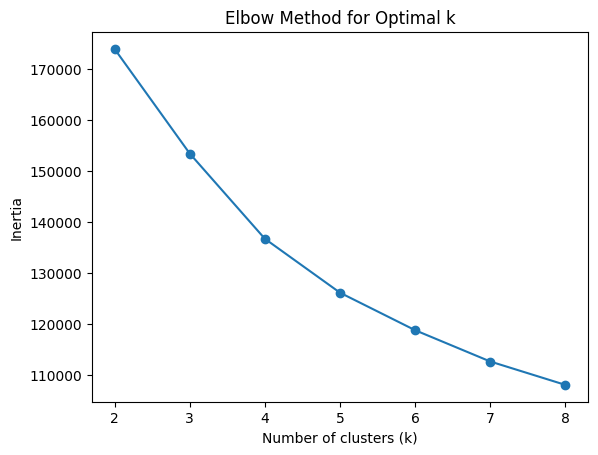

In [9]:
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


Based on the Elbow Method, a suitable number of clusters was selected.


In [10]:
# Final model with optimized k (example: k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


## 6. Análise dos Clusters

In [11]:
df["Cluster"].value_counts()


Cluster
0    3970
1    3960
2    3804
3    1657
Name: count, dtype: int64

In [12]:
cluster_stats = df.groupby("Cluster")[features].agg(
    ["mean", "std", "min", "max"]
)

cluster_stats


age                   player_height                            \
              mean       std min max          mean       std     min     max   
Cluster                                                                        
0        27.155919  4.292836  19  42    207.911353  5.203120  192.95  231.48   
1        26.494444  4.521786  18  44    203.795313  7.202904  175.56  231.48   
2        27.184017  4.332220  18  42    192.457766  6.416054  160.33  212.40   
3        27.429089  3.927015  19  41    198.953054  9.075365  175.56  228.67   

        player_weight             ...   WS            VORP                 \
                 mean        std  ...  min   max      mean       std  min   
Cluster                           ...                                       
0          109.158957   8.702071  ... -1.5  12.8  0.619673  0.822586 -2.6   
1          102.856303  10.816588  ... -1.9   2.1 -0.146086  0.223013 -1.8   
2           88.944185   7.270408  ... -2.1   7.8  0.226551  0.611331 -1.8   
3           97.874146  12.237461  ... -0.2  20.3  3.229934  1.696034  0.0   

                    BPM                         
          max      mean       std   min    max  
Cluster                                         
0         4.8 -0.345894  2.493717  -7.6   41.5  
1         0.7 -5.426010  5.403397 -92.1   16.5  
2         2.7 -1.411540  3.011383 -13.2   97.4  
3        11.8  3.491129  6.824924  -1.7  242.2  

[4 rows x 68 columns]

### Distribuição das Posições dos Jogadores por Cluster


In [13]:
pd.crosstab(df["Cluster"], df["Pos.x"], normalize="index")


Pos.x,C,PF,PG,SF,SG
Cluster,,,,,
0,0.412343,0.356675,0.001259,0.195970,0.033753
1,0.236111,0.258838,0.061616,0.247980,0.195455
2,0.000000,0.009201,0.477129,0.114353,0.399317
3,0.091732,0.163549,0.318648,0.191913,0.234158


In [14]:
pd.crosstab(df["Cluster"], df["season"], normalize="index")


season,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,...,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.029723,0.031990,0.029219,0.033249,0.032746,0.034257,0.031990,0.032746,0.035013,0.032746,...,0.041058,0.039798,0.040302,0.042821,0.039043,0.036272,0.037280,0.043073,0.037783,0.034761
1,0.034596,0.033333,0.039394,0.031818,0.031313,0.032323,0.033081,0.034091,0.034848,0.036616,...,0.032071,0.030556,0.032323,0.039646,0.038384,0.042424,0.039141,0.046970,0.036616,0.046970
2,0.032072,0.032334,0.033649,0.031546,0.032860,0.031020,0.026551,0.029706,0.032860,0.031546,...,0.038118,0.038644,0.038906,0.042324,0.041798,0.041798,0.045741,0.048633,0.046004,0.044690
3,0.038021,0.034400,0.023537,0.036210,0.037417,0.035003,0.041642,0.038624,0.037417,0.038021,...,0.030779,0.029572,0.029572,0.031382,0.038624,0.035003,0.038021,0.037417,0.041642,0.045866


## 7. Interpretação dos Clusters

Cada cluster representa um **perfil de jogador distinto** com base no desempenho estatístico:

- **Cluster 0**: Jogadores de alto uso com métricas ofensivas fortes  
- **Cluster 1**: Jogadores de apoio com uso limitado e menor tempo em campo  
- **Cluster 2**: Organizadores de jogo com maior número de assistências e taxa de uso elevada  
- **Cluster 3**: Jogadores eficientes com contribuições equilibradas  

Estes perfis podem ser utilizados para apoiar a **construção de plantéis** e a **análise comparativa de jogadores**.


## 8. Conclusões

A abordagem de **clustering K-Means** identificou com sucesso **perfis distintos de jogadores da NBA** com base em métricas de desempenho.

A análise evidencia a **utilidade das técnicas de aprendizagem não supervisionada** em análise desportiva, particularmente para **segmentação de jogadores** e **análise exploratória de desempenho**.

Como trabalho futuro, poderão ser incluídas **variáveis adicionais**, **métricas defensivas** ou **algoritmos de clustering alternativos**.